# Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

The **CO2 EMISSIONS (g/km)** column is the dependent column, and the rest are the independent columns.

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
print(f'The shape of the data frame : {df.shape}')

The shape of the data frame : (1067, 13)


In [4]:
df.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [5]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df = df[
    ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
     'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']
]

df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


# Exercise 1 : Histogram

Plot a Histogram for the following columns :-

1. CO2EMISSIONS
2. CYLINDERS
3. ENGINESIZE
4. FUELCONSUMPTION_COMB
5. FUELCONSUMPTION_CITY
6. FUELCONSUMPTION_HWY
7. FUELCONSUMPTION_COMB_MPG

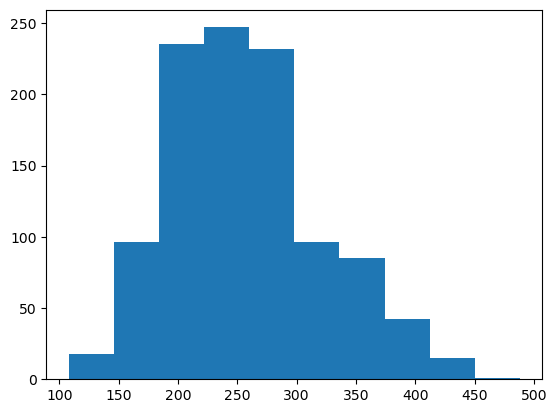

In [8]:
plt.hist(x = df['CO2EMISSIONS'])
plt.show()

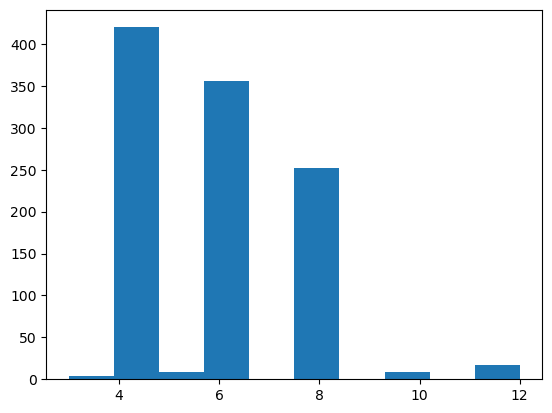

In [9]:
plt.hist(x = df['CYLINDERS'])
plt.show()

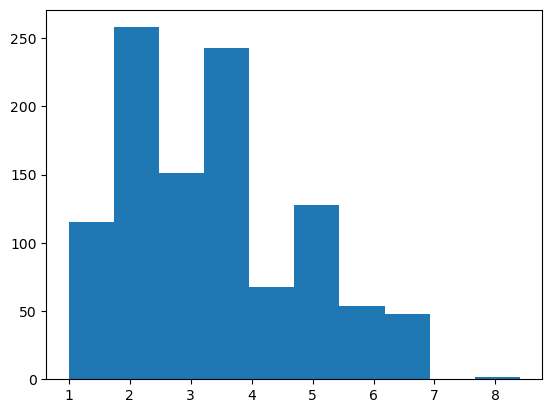

In [10]:
plt.hist(x = df['ENGINESIZE'])
plt.show()

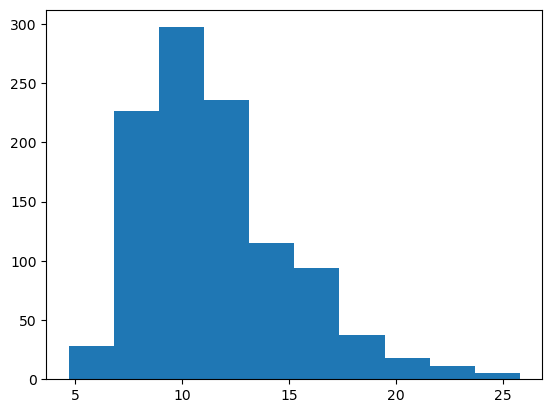

In [11]:
plt.hist(x = df['FUELCONSUMPTION_COMB'])
plt.show()

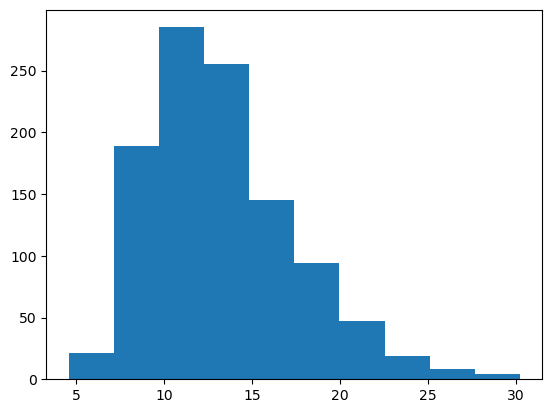

In [12]:
plt.hist(x = df['FUELCONSUMPTION_CITY'])
plt.show()

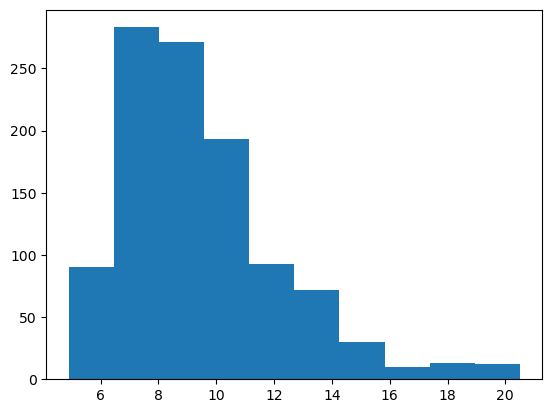

In [13]:
plt.hist(x = df['FUELCONSUMPTION_HWY'])
plt.show()

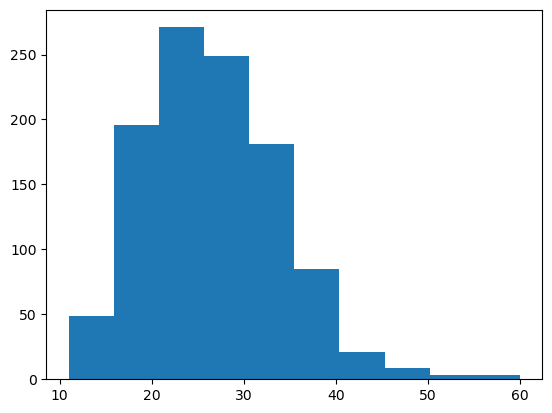

In [14]:
plt.hist(x = df['FUELCONSUMPTION_COMB_MPG'])
plt.show()

# Exercise 2 : Scatter Plots

Plot 7 scatter plots, the 7 X features with CO2EMISSIONS.

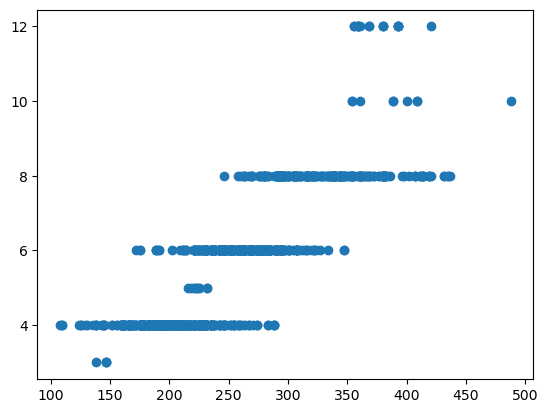

In [15]:
plt.scatter(x = df['CO2EMISSIONS'], y = df['CYLINDERS'])
plt.show()

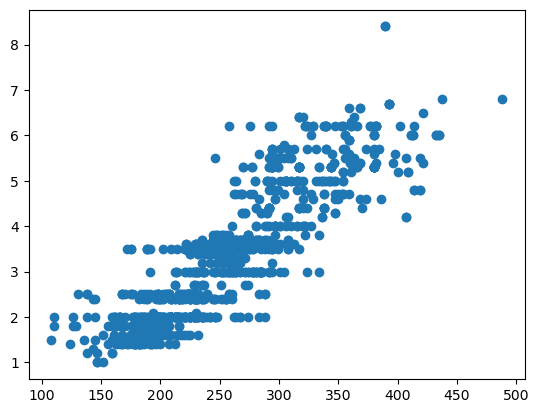

In [16]:
plt.scatter(x = df['CO2EMISSIONS'], y = df['ENGINESIZE'])
plt.show()

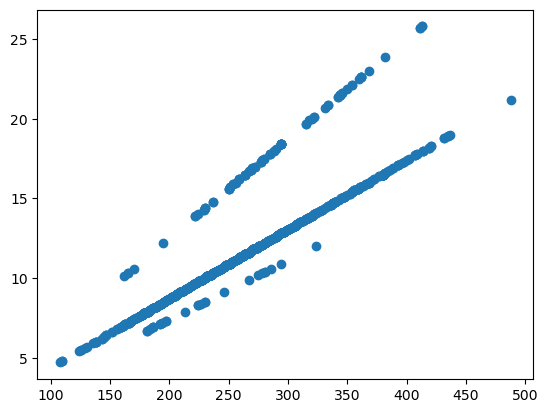

In [17]:
plt.scatter(x = df['CO2EMISSIONS'], y = df['FUELCONSUMPTION_COMB'])
plt.show()

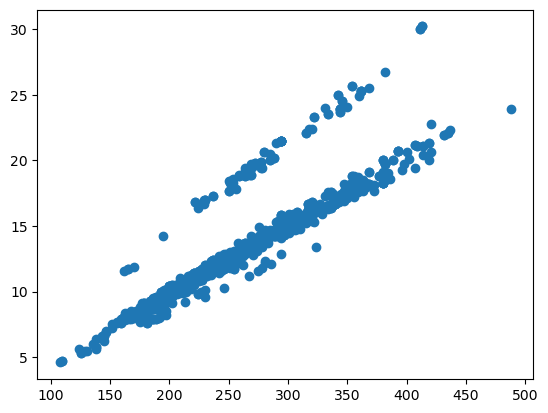

In [18]:
plt.scatter(x = df['CO2EMISSIONS'], y = df['FUELCONSUMPTION_CITY'])
plt.show()

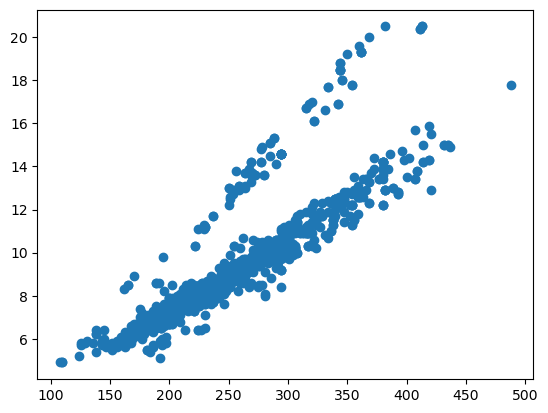

In [19]:
plt.scatter(x = df['CO2EMISSIONS'], y = df['FUELCONSUMPTION_HWY'])
plt.show()

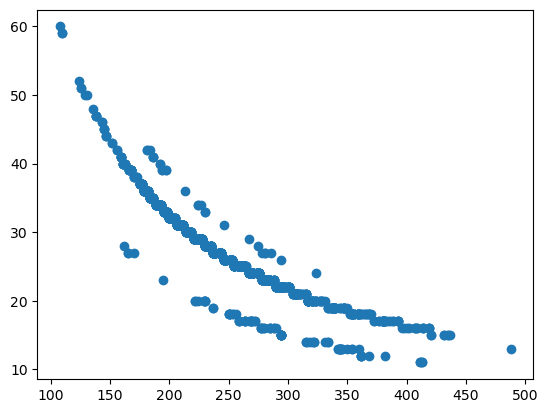

In [20]:
plt.scatter(x = df['CO2EMISSIONS'], y = df['FUELCONSUMPTION_COMB_MPG'])
plt.show()

# Exercise 3 : Box Plots

Plot 6 box plots for :-
1. CYLINDERS
2. ENGINESIZE
3. FUELCONSUMPTION_COMB
4. FUELCONSUMPTION_CITY
5. FUELCONSUMPTION_HWY
6. FUELCONSUMPTION_COMB_MPG

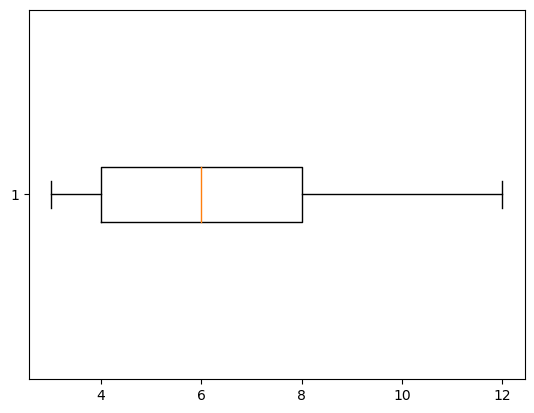

In [21]:
#df['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB_MPG']
plt.boxplot(x = df['CYLINDERS'], vert = False)
plt.show()

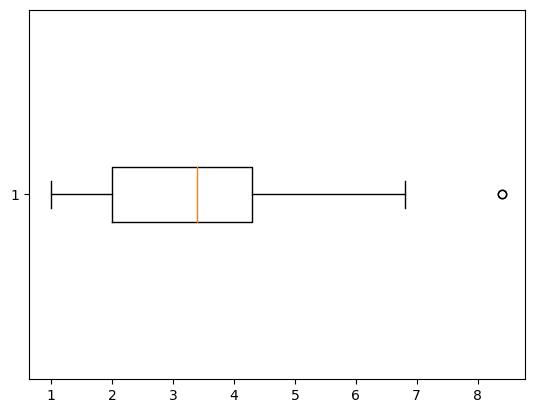

In [22]:
#df['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB_MPG']
plt.boxplot(x = df['ENGINESIZE'], vert = False)
plt.show()

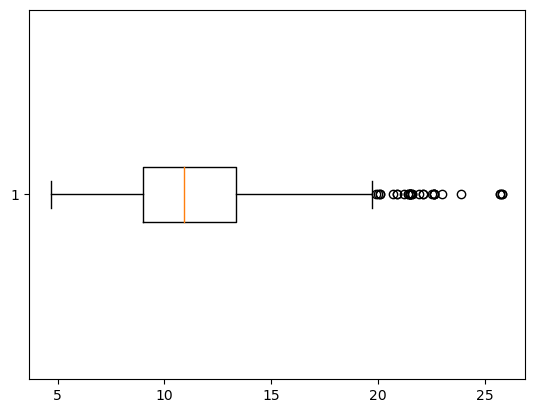

In [23]:
#df['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB_MPG']
plt.boxplot(x = df['FUELCONSUMPTION_COMB'], vert = False)
plt.show()

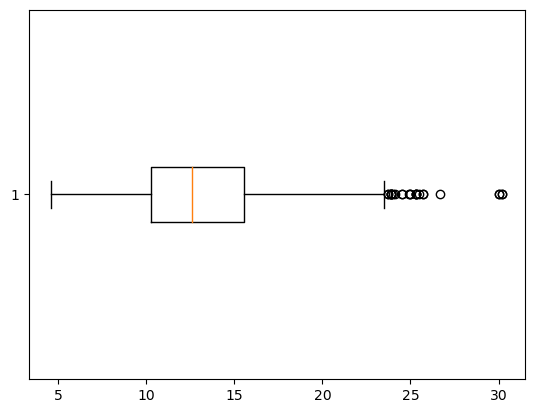

In [24]:
#df['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB_MPG']
plt.boxplot(x = df['FUELCONSUMPTION_CITY'], vert = False)
plt.show()

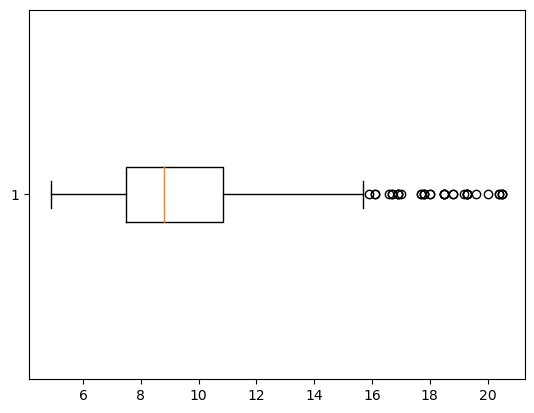

In [25]:
#df['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB_MPG']
plt.boxplot(x = df['FUELCONSUMPTION_HWY'], vert = False)
plt.show()

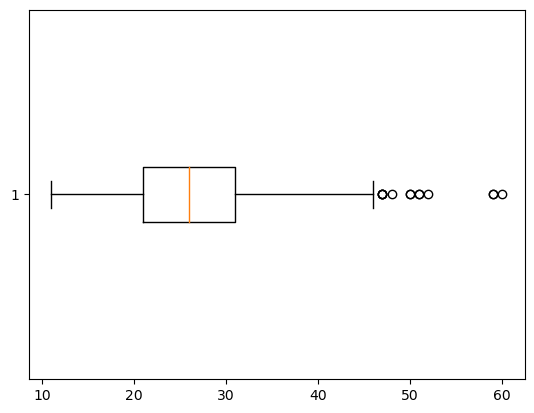

In [26]:
#df['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB_MPG']
plt.boxplot(x = df['FUELCONSUMPTION_COMB_MPG'], vert = False)
plt.show()

# Exercise 4 : Remove Outliers

Then plot a box plot to check if the outliers was removed or not.

In [27]:
x = np.percentile(df['ENGINESIZE'], 25, interpolation = 'midpoint')
y = np.percentile(df['ENGINESIZE'], 75, interpolation = 'midpoint')
z = y - x   
print(x - 1.5*(z))
print(y + 1.5*(z))

-1.4499999999999997
7.75


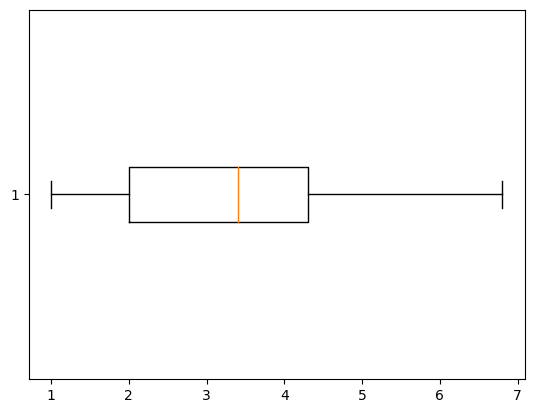

In [28]:
df.drop(df[(df['ENGINESIZE'] > 7.75) | (df['ENGINESIZE'] < -1.45)].index, inplace = True)
plt.boxplot(x = df['ENGINESIZE'], vert = False)
plt.show()

In [29]:
x = np.percentile(df['FUELCONSUMPTION_COMB'], 25, interpolation = 'midpoint')
y = np.percentile(df['FUELCONSUMPTION_COMB'], 75, interpolation = 'midpoint')
z = y - x   
print(x - 1.5*(z))
print(y + 1.5*(z))

2.549999999999999
19.75


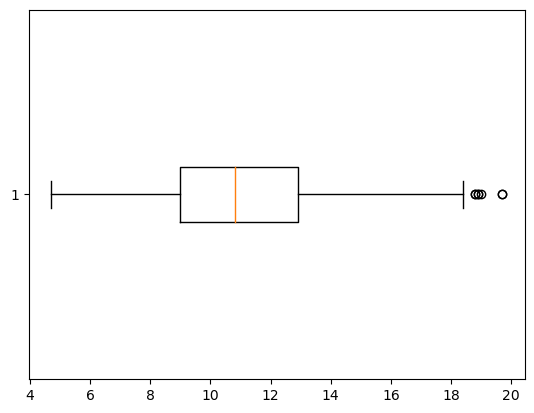

In [30]:
df.drop(df[(df['FUELCONSUMPTION_COMB'] > 19.75) | (df['FUELCONSUMPTION_COMB'] < 2.55)].index, inplace = True)
plt.boxplot(x = df['FUELCONSUMPTION_COMB'], vert = False)
plt.show()

In [31]:
x = np.percentile(df['FUELCONSUMPTION_CITY'], 25, interpolation = 'midpoint')
y = np.percentile(df['FUELCONSUMPTION_CITY'], 75, interpolation = 'midpoint')
z = y - x   
print(x - 1.5*(z))
print(y + 1.5*(z))

2.8499999999999988
22.45


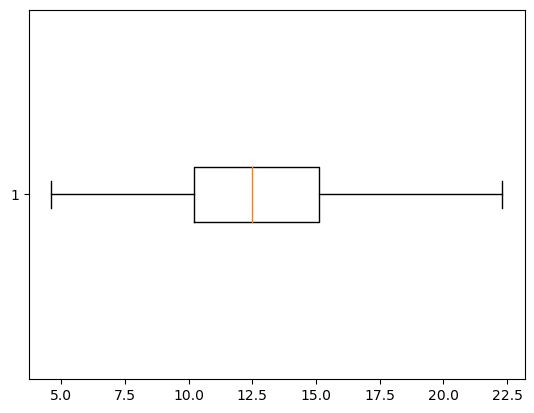

In [32]:
df.drop(df[(df['FUELCONSUMPTION_CITY'] > 22.45) | (df['FUELCONSUMPTION_CITY'] < 2.85)].index, inplace = True)
plt.boxplot(x = df['FUELCONSUMPTION_CITY'], vert = False)
plt.show()

In [33]:
x = np.percentile(df['FUELCONSUMPTION_HWY'], 25, interpolation = 'midpoint')
y = np.percentile(df['FUELCONSUMPTION_HWY'], 75, interpolation = 'midpoint')
z = y - x   
print(x - 1.5*(z))
print(y + 1.5*(z))

3.1499999999999995
14.75


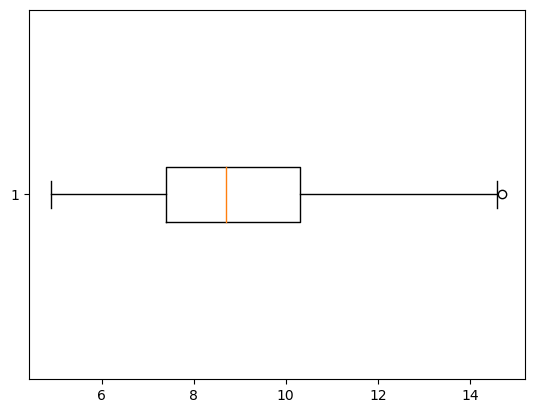

In [34]:
df.drop(df[(df['FUELCONSUMPTION_HWY'] > 14.75) | (df['FUELCONSUMPTION_HWY'] < 3.14)].index, inplace = True)
plt.boxplot(x = df['FUELCONSUMPTION_HWY'], vert = False)
plt.show()

In [35]:
x = np.percentile(df['FUELCONSUMPTION_COMB_MPG'], 25, interpolation = 'midpoint')
y = np.percentile(df['FUELCONSUMPTION_COMB_MPG'], 75, interpolation = 'midpoint')
z = y - x   
print(x - 1.5*(z))
print(y + 1.5*(z))

7.75
45.75


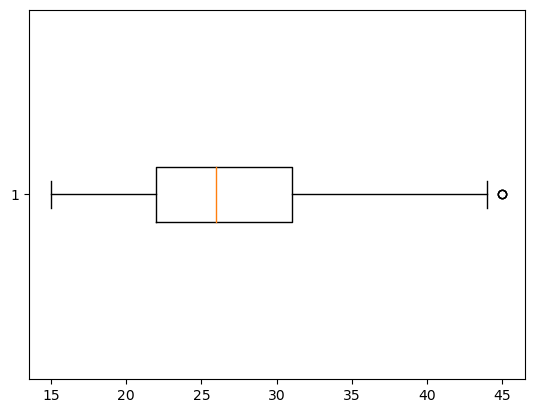

In [36]:
df.drop(df[(df['FUELCONSUMPTION_COMB_MPG'] > 45.75) | (df['FUELCONSUMPTION_COMB_MPG'] < 7.75)].index, inplace = True)
plt.boxplot(x = df['FUELCONSUMPTION_COMB_MPG'], vert = False)
plt.show()

# Exercise 5 : Train and Test Split

Split the features in X variable and target in the Y variable.

Then use train_test_split method to split the dataset into train and test sets.

The test set have 20% of the dataset and the random state is 42.

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x = df.loc[:,['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB_MPG']]
y = df.loc[:,'CO2EMISSIONS']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_COMB,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB_MPG
0,4,2.0,8.5,9.9,6.7,33
1,4,2.4,9.6,11.2,7.7,29
3,6,3.5,11.1,12.7,9.1,25
4,6,3.5,10.6,12.1,8.7,27
5,6,3.5,10.0,11.9,7.7,28
...,...,...,...,...,...,...
1062,6,3.0,11.8,13.4,9.8,24
1063,6,3.2,11.5,13.2,9.5,25
1064,6,3.0,11.8,13.4,9.8,24
1065,6,3.2,11.3,12.9,9.3,25


In [39]:
print(f'test is :', y_test.count(),'train is :', y_train.count())

test is : 200 train is : 800


# Exercise 4 : Simple Linear Regression.

Train a simple linear regression

X = Engine Size.
Y = Emission.

What is the coefficients and y intercept?

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
x = df[['ENGINESIZE']]
y = df[['CO2EMISSIONS']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.score(x_test, y_test))
wight = reg.coef_
bias = reg.intercept_
print('coef:', wight, "inter:", bias)

0.7608594923114446
coef: [[36.23534955]] inter: [133.94831955]


# Exercise 5 : Plot the Output

Plot linear regression model (output).

In [42]:
df.shape

(1000, 7)

In [43]:
x= np.array(df['ENGINESIZE']).reshape(-1, 1)
y= np.array(df['CO2EMISSIONS'] ).reshape(-1, 1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 1)
(200, 1)
(800, 1)
(200, 1)


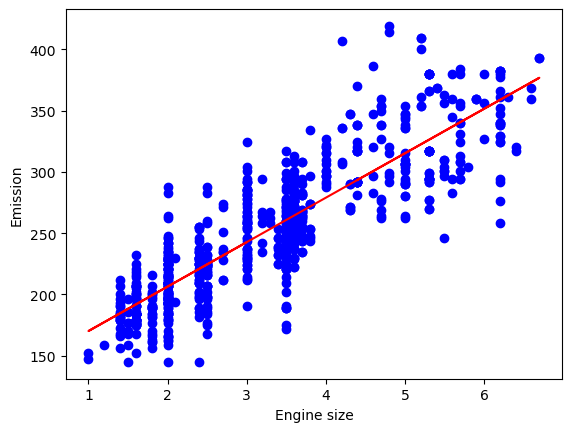

In [44]:
y_pred = reg.predict(x_train)
plt.scatter(x_train, y_train, color ='b')
plt.plot(x_train, y_pred, color ='r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Exercise 6 : Evaluation

Evaluate the model using MSE, RMSE, MAE, and R^2.

In [45]:
X_test = np.array(x_test)
y_pred = reg.predict(X_test.reshape(-1, 1))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test ,y_pred))
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test , y_pred))
print("R2-score: %.2f" % r2_score(y_test , y_pred) )

Mean absolute error: 23.26
Mean squared error (MSE): 987.64
R2-score: 0.76


# Exercise 7 : Repeat 4, 5, and 6

Repeat the steps 4, 5, and 6.

For the rest features (CYLINDERS, FUELCONSUMPTION_COMB, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY) and then sort the models based on the best performance.

Note : Do not train the FUELCONSUMPTION_COMB_MPG.

coefficients :  [18.53253994]
Intercept :  44.74186918353894
Mean absolute error: 13.67
Mean squared error (MSE): 477.50
R2-score: 0.88


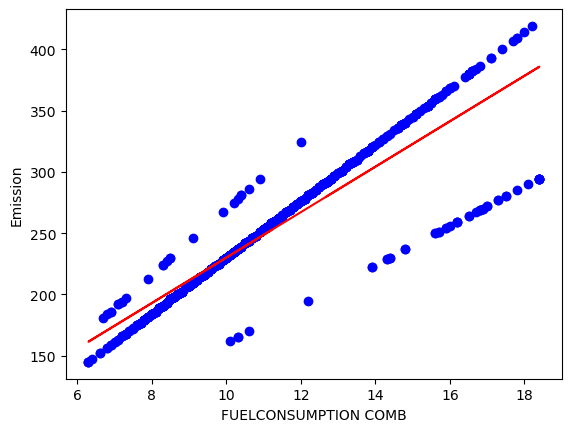

In [46]:
x = df['FUELCONSUMPTION_COMB']
y = df['CO2EMISSIONS']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = np.array(x_train)
y_train = np.array(y_train)
reg = LinearRegression()
reg.fit(x_train.reshape(-1, 1), y_train)
print ("coefficients : ",reg.coef_)
print ("Intercept : ",reg.intercept_) 
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, reg.coef_ * x_train + reg.intercept_, color='red')
plt.xlabel("FUELCONSUMPTION COMB")
plt.ylabel("Emission")
x_test = np.array(x_test)
y_pred = reg.predict(x_test.reshape(-1, 1))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test ,y_pred))
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test , y_pred))
print("R2-score: %.2f" % r2_score(y_test , y_pred) )

coefficients :  [15.40112885]
Intercept :  53.91751269823109
Mean absolute error: 14.21
Mean squared error (MSE): 510.54
R2-score: 0.88


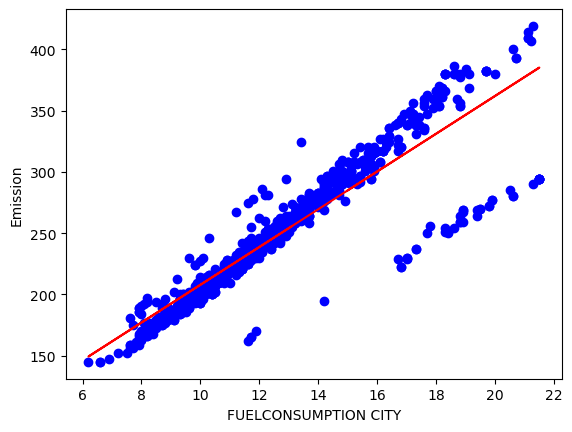

In [47]:
x = df['FUELCONSUMPTION_CITY']
y = df['CO2EMISSIONS']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = np.array(x_train)
y_train = np.array(y_train)
reg = LinearRegression()
reg.fit(x_train.reshape(-1, 1), y_train)
print ("coefficients : ",reg.coef_)
print ("Intercept : ",reg.intercept_) 
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, reg.coef_ * x_train + reg.intercept_ , color='red')
plt.xlabel("FUELCONSUMPTION CITY")
plt.ylabel("Emission")
x_test = np.array(x_test)
y_pred = reg.predict(x_test.reshape(-1, 1))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test ,y_pred))
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test , y_pred))
print("R2-score: %.2f" % r2_score(y_test , y_pred) )

coefficients :  [23.2251742]
Intercept :  40.11342703353694
Mean absolute error: 17.01
Mean squared error (MSE): 607.59
R2-score: 0.85


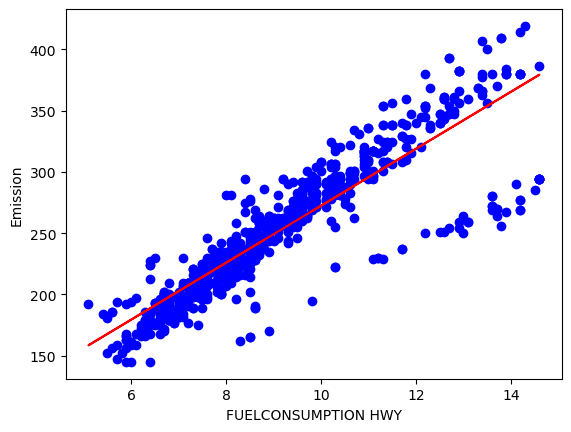

In [48]:
x = df['FUELCONSUMPTION_HWY']
y = df['CO2EMISSIONS']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = np.array(x_train)
y_train = np.array(y_train)
reg = LinearRegression()
reg.fit(x_train.reshape(-1, 1), y_train)
print ("coefficients : ",reg.coef_)
print ("Intercept : ",reg.intercept_) 
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, reg.coef_ * x_train + reg.intercept_, color='red')
plt.xlabel("FUELCONSUMPTION HWY")
plt.ylabel("Emission")
x_test = np.array(x_test)
y_pred = reg.predict(x_test.reshape(-1, 1))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test ,y_pred))
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test , y_pred))
print("R2-score: %.2f" % r2_score(y_test , y_pred) )

coefficients :  [27.63015278]
Intercept :  94.48970454676135
Mean absolute error: 26.83
Mean squared error (MSE): 1180.23
R2-score: 0.71


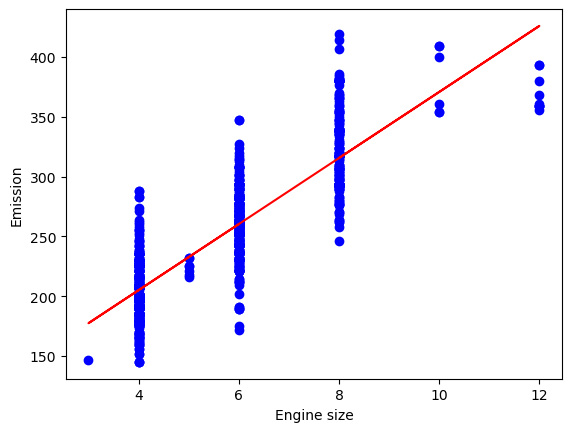

In [49]:
x = df['CYLINDERS']
y = df['CO2EMISSIONS']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = np.array(x_train)
y_train = np.array(y_train)
reg = LinearRegression()
reg.fit(x_train.reshape(-1, 1), y_train)
print ("coefficients : ",reg.coef_)
print ("Intercept : ",reg.intercept_) 
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, reg.coef_ * x_train + reg.intercept_, color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
x_test = np.array(x_test)
y_pred = reg.predict(x_test.reshape(-1, 1))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test ,y_pred))
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test , y_pred))
print("R2-score: %.2f" % r2_score(y_test , y_pred) )


# Exercise 8 : Multiple Linear Regression

Train one linear regression model with the following features :-

1. CYLINDERS
2. ENGINESIZE
3. FUELCONSUMPTION_COMB
4. FUELCONSUMPTION_CITY
5. FUELCONSUMPTION_HWY

Plot the output for each feature with the Y label. #optional